In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('job dataset.csv',encoding='ISO-8859-1')
print(df.head())

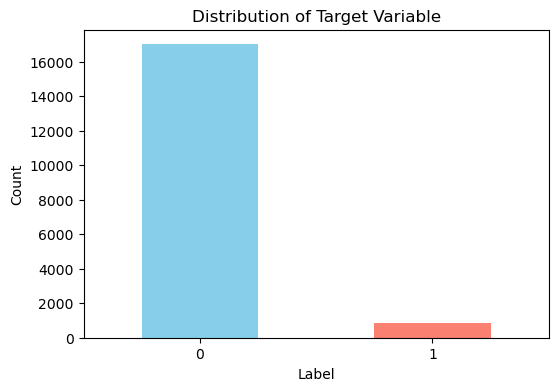

In [11]:
plt.figure(figsize=(6, 4))
df['fraudulent'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Target Variable')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [22]:
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_title     17880 non-null  object
 1   location      17534 non-null  object
 2   salary_range  2868 non-null   object
 3   description   17879 non-null  object
 4   function      11425 non-null  object
 5   fraudulent    17880 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 838.2+ KB
None


In [24]:
df['job_title'] = df['job_title'].apply(lambda x: ' '.join([word.lower() for word in word_tokenize(x) if word.isalpha()]))
stop_words = set(stopwords.words('english'))
df['job_title'] = df['job_title'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


In [33]:
X = df['job_title']
y = df['fraudulent']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [39]:
rf_classifier = RandomForestClassifier(random_state=42)

In [40]:
param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
    }

In [41]:
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [42]:
best_rf_model = grid_search.best_estimator_
predictions = best_rf_model.predict(X_test_tfidf)


Accuracy: 96.81%


Text(0.5, 1.0, 'Accuracy')

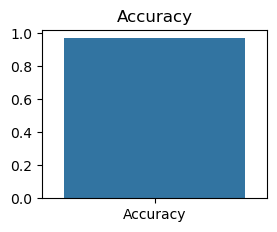

In [51]:
accuracy = accuracy_score(y_test, predictions)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

plt.subplot(2, 2, 1)
sns.barplot(x=['Accuracy'], y=[accuracy])
plt.title('Accuracy')


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3395
           1       0.81      0.48      0.60       181

    accuracy                           0.97      3576
   macro avg       0.89      0.74      0.79      3576
weighted avg       0.96      0.97      0.96      3576



Text(0.5, 1.0, 'Classification Report')

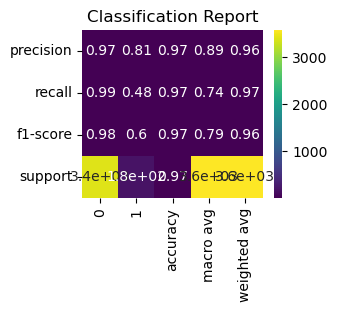

In [52]:
print("\nClassification Report:")
print(classification_report(y_test, predictions))

plt.subplot(2, 2, 2)
sns.heatmap(pd.DataFrame.from_dict(classification_report(y_test, predictions, output_dict=True)), annot=True, cmap='viridis')
plt.title('Classification Report')


Confusion Matrix:
[[3375   20]
 [  94   87]]


Text(0.5, 1.0, 'Confusion Matrix')

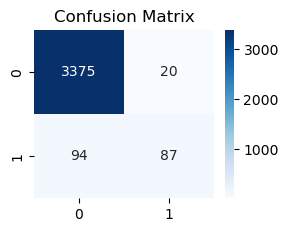

In [53]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))

plt.subplot(2, 2, 3)
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')